## Classification using vertebrate data set
### Using Decision Tree Classifier

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_csv('data/vertebrate/data.csv')

In [3]:
# List of all classes
data['Class Label']

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
15          NaN
Name: Class Label, dtype: object

In [4]:
# List of unique classes
data['Class Label'].unique()

array(['mammal', 'reptile', 'fish', 'amphibian', 'bird', nan], dtype=object)

In [5]:
# Number of entries for each unique classes
class_group = data.groupby('Class Label').apply(lambda x: len(x))
class_group

Class Label
amphibian      2
bird           2
fish           3
mammal         5
reptile        3
dtype: int64

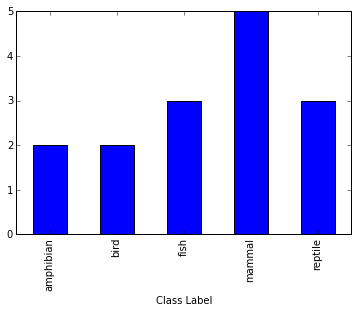

In [6]:
# Plot bar chart based on Class Label
class_group.plot(kind='bar', grid=False)

In [7]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['Name', 'Body Temperature', 'Skin Cover', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature', 'Has Legs', 'Hibernates']

X_feature = data[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_int = vect.fit_transform(X_dict)

# print the features
# vect.get_feature_names()

# 0 to 14 is train set
X_Train = X_int[:-1]
# 15th is test set
X_Test = X_int[-1:] 

# Used to vectorize the class label
le = LabelEncoder()
y_train = le.fit_transform(data['Class Label'][:-1])

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_Train,y_train)

In [9]:
# Predict the test data, not seen earlier
le.inverse_transform(clf.predict(X_Test))

array(['reptile'], dtype=object)

In [10]:
# prediction with the same training set
Train_predict = clf.predict(X_Train)

In [11]:
# The model predicted the training set correctly
(Train_predict == y_train).all()

True